In [405]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [406]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.impute import SimpleImputer

In [407]:
df = pd.read_csv("Dataset.csv")
# df

In [408]:
pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# df.head()

In [409]:
# df.info()
df.describe()

,Unnamed: 0,Id,year,price,distance_travelled(kms),brand_rank,car_age,distance below 30k km,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,std_invprice,std_invdistance_travelled,std_invrank,best_buy1,best_buy2
count,1725.00,1725.00,1725.00,1725.00,1725.00,1725.00,1725.00,1725.00,1725.00,1725.00,1725.00,1725.00,1725.00,1725.00,1725.00,1725.00,1725.00,1725.00
mean,862.00,862.00,2015.39,1494837.39,53848.26,15.73,5.61,0.27,0.21,0.00,0.00,inf,0.19,0.08,0.01,0.18,88.96,32.54
std,498.11,498.11,3.21,1671657.73,44725.54,12.95,3.21,0.44,0.41,0.00,0.00,NaN,0.25,0.08,0.04,0.26,188.95,158.66
min,0.00,0.00,1990.00,62500.00,350.00,1.00,0.00,0.00,0.00,0.00,0.00,0.03,0.01,0.00,0.00,0.00,0.00,0.00
25%,431.00,431.00,2013.00,545000.00,29000.00,5.00,3.00,0.00,0.00,0.00,0.00,0.12,0.04,0.03,0.00,0.03,14.24,0.00
50%,862.00,862.00,2016.00,875000.00,49000.00,14.00,5.00,0.00,0.00,0.00,0.00,0.20,0.07,0.07,0.01,0.06,36.72,0.00
75%,1293.00,1293.00,2018.00,1825000.00,70500.00,24.00,8.00,1.00,0.00,0.00,0.00,0.33,0.20,0.11,0.01,0.19,90.78,0.00
max,1724.00,1724.00,2021.00,14700000.00,790000.00,81.00,31.00,1.00,1.00,0.00,0.00,inf,1.00,1.00,1.00,1.00,2477.52,2477.52


In [410]:
# checking for nulls in each column
df.isnull().sum()

Unnamed: 0                   0
Id                           0
year                         0
brand                        0
full_model_name              0
model_name                   0
price                        0
distance_travelled(kms)      0
fuel_type                    0
city                         0
brand_rank                   0
car_age                      0
distance below 30k km        0
new and less used            0
inv_car_price                0
inv_car_dist                 0
inv_car_age                  0
inv_brand                    0
std_invprice                 0
std_invdistance_travelled    0
std_invrank                  0
best_buy1                    0
best_buy2                    0
dtype: int64

In [411]:
# drop some repeating cols
df = df.drop(['Unnamed: 0', 'Id'], axis=1)
# df.columns
df.head(0)

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,distance below 30k km,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,std_invprice,std_invdistance_travelled,std_invrank,best_buy1,best_buy2


In [412]:
def get_heat_map_corr(corr_df, figsize=(10, 9), remove_cols=[], corr_method='pearson', title=None, mirrored=False):

    df_temp = corr_df
    for i in remove_cols:
        try:
            df_temp = df_temp.drop(i,axis=1)
        except:
            print(f'column {i} not found')
    
    for c in df_temp.columns:
        if df_temp[c].dtype == 'object':
            df_temp = df_temp.drop(c,axis=1)

    corr = df_temp.corr(method=corr_method)

    f, ax = plt.subplots(figsize=figsize)

    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    if title != None:
        plt.title(title)

    if mirrored == False:
        sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
    else:
        sns.heatmap(corr, annot=True, cmap=cmap)

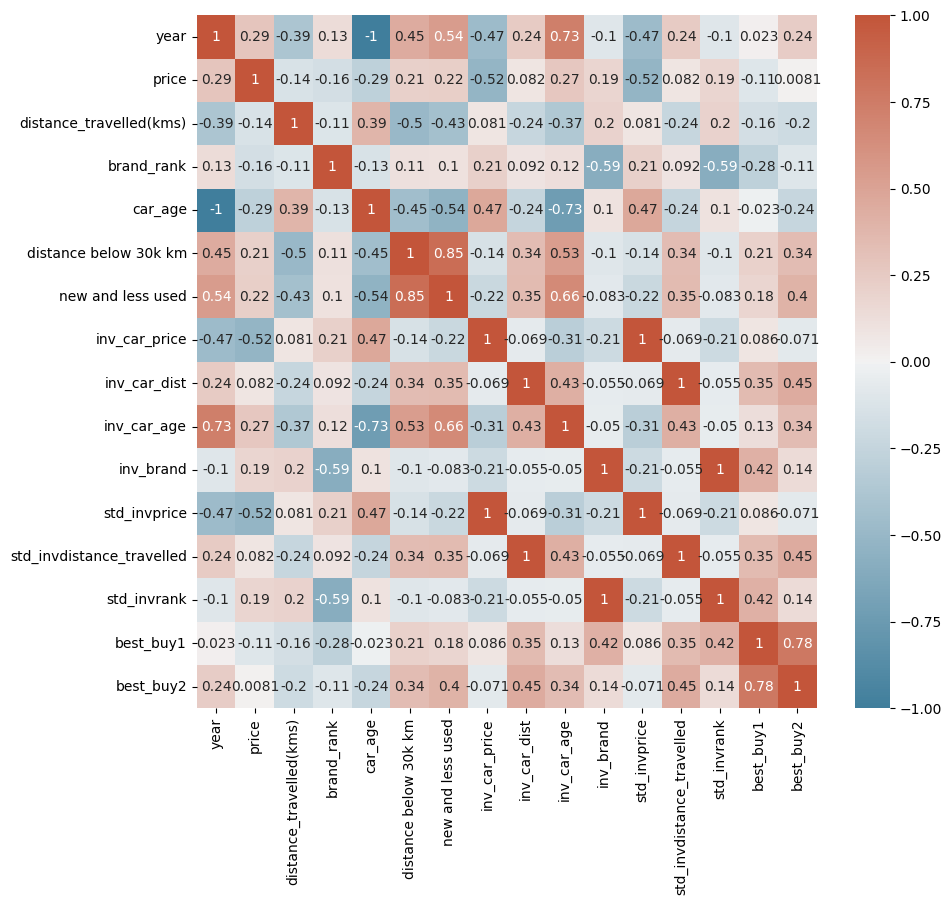

In [413]:
# get_heat_map_corr of df without column of object dtype
get_heat_map_corr(df, mirrored=True)

Text(0.5, 1.0, 'inv_brand || std_invrank')

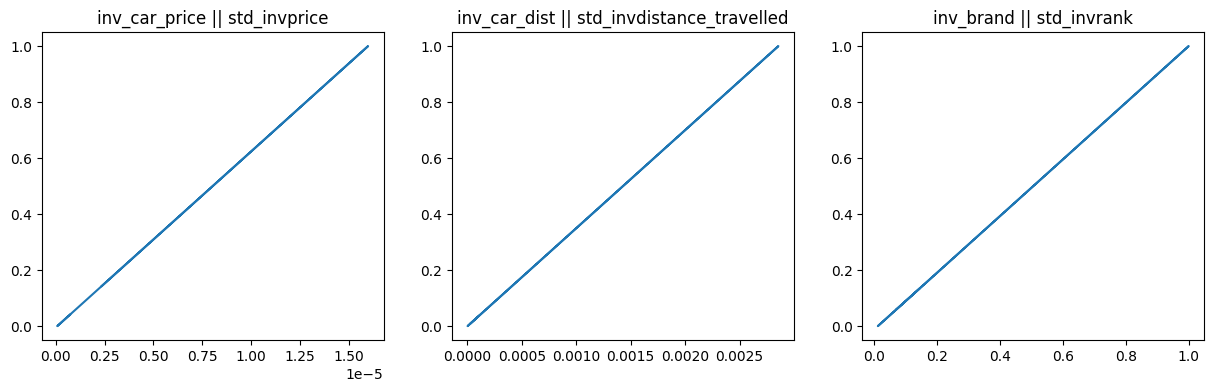

In [414]:
# plotting the columns with correlation = 1, meaning they have same data, one of correlation columns can be ommited for ML
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].plot( df['inv_car_price'], df['std_invprice'] )
axes[0].set_title( 'inv_car_price || std_invprice')

axes[1].plot( df['inv_car_dist'], df['std_invdistance_travelled'] )
axes[1].set_title( 'inv_car_dist || std_invdistance_travelled')

axes[2].plot( df['inv_brand'], df['std_invrank'] )
axes[2].set_title( 'inv_brand || std_invrank')

In [415]:
# delete correlating columns
corr_cols_to_del = [
    'std_invprice',
    'std_invdistance_travelled',
    'std_invrank',
]
df = df.drop(corr_cols_to_del, axis=1)
df.head(2)

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,distance below 30k km,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,best_buy1,best_buy2
0,2016,Honda,Honda Brio S MT,Brio,425000.00,9680.00,Petrol,Mumbai,7,5.00,1,0,0.00,0.00,0.20,0.14,677.13,0.00
1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.00,119120.00,Diesel,Mumbai,11,9.00,0,0,0.00,0.00,0.11,0.09,37.50,0.00


In [416]:
# delete dublicates
df.duplicated().sum()
print(df.shape)
print(df.duplicated().sum())
df.drop_duplicates(keep = 'first', inplace = True)
print(df.shape)

(1725, 18)
425
(1300, 18)


In [417]:
# make label columns with object dtype
label = LabelEncoder()

cols_to_encode = [i for i in df.columns if df[i].dtype == 'object']
cols_to_encode

df_labeled = df[:]
for c in cols_to_encode:
    label.fit(df_labeled[c].drop_duplicates())
    df_labeled[c] = label.transform(df_labeled[c])
    # print(c, df_labeled[c].isnull().sum())

df_labeled.head(1)

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,distance below 30k km,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,best_buy1,best_buy2
0,2016,7,131,28,425000.00,9680.00,3,9,7,5.00,1,0,0.00,0.00,0.20,0.14,677.13,0.00


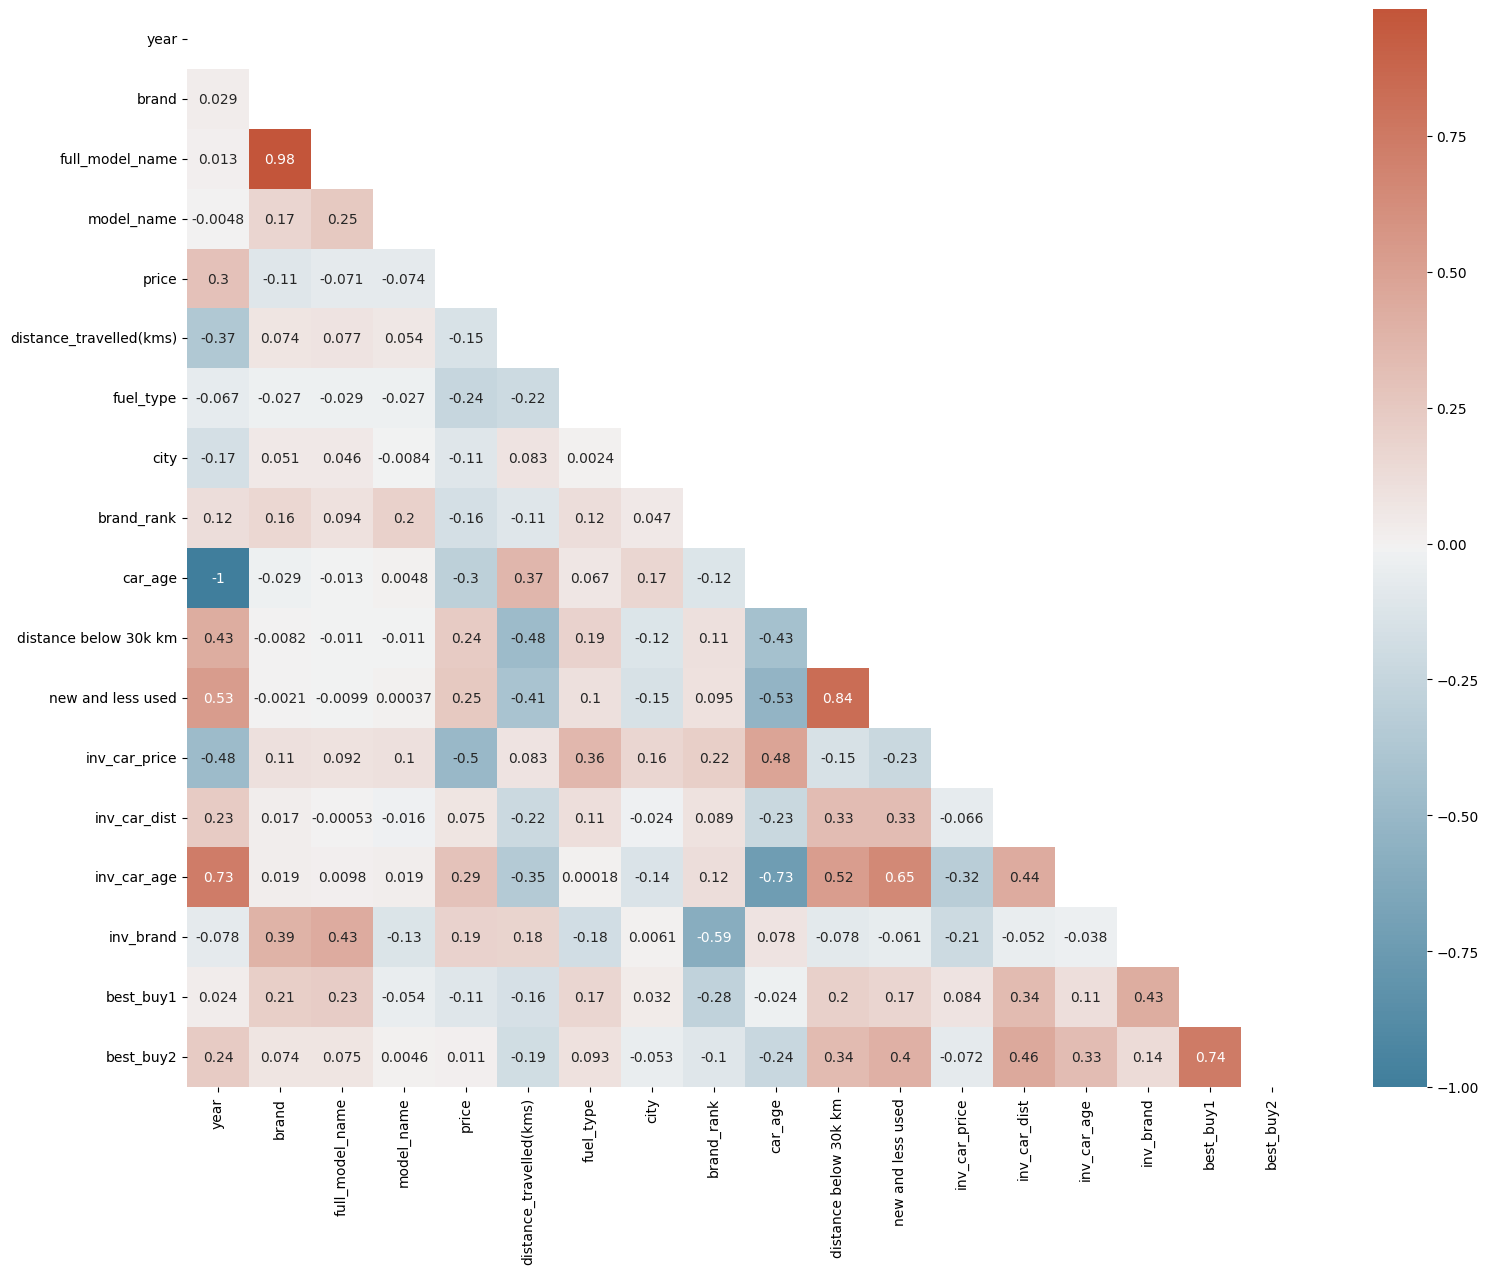

In [418]:
# plot data with labeled columns
get_heat_map_corr( df_labeled,figsize=(18,14) )

column ['full_model_name', 'city', 'brand_rank', 'car_age', 'distance below 30k km', 'new and less used', 'inv_car_price', 'inv_car_dist', 'inv_car_age', 'inv_brand', 'std_invprice', 'std_invdistance_travelled', 'std_invrank', 'best_buy1', 'best_buy2'] not found


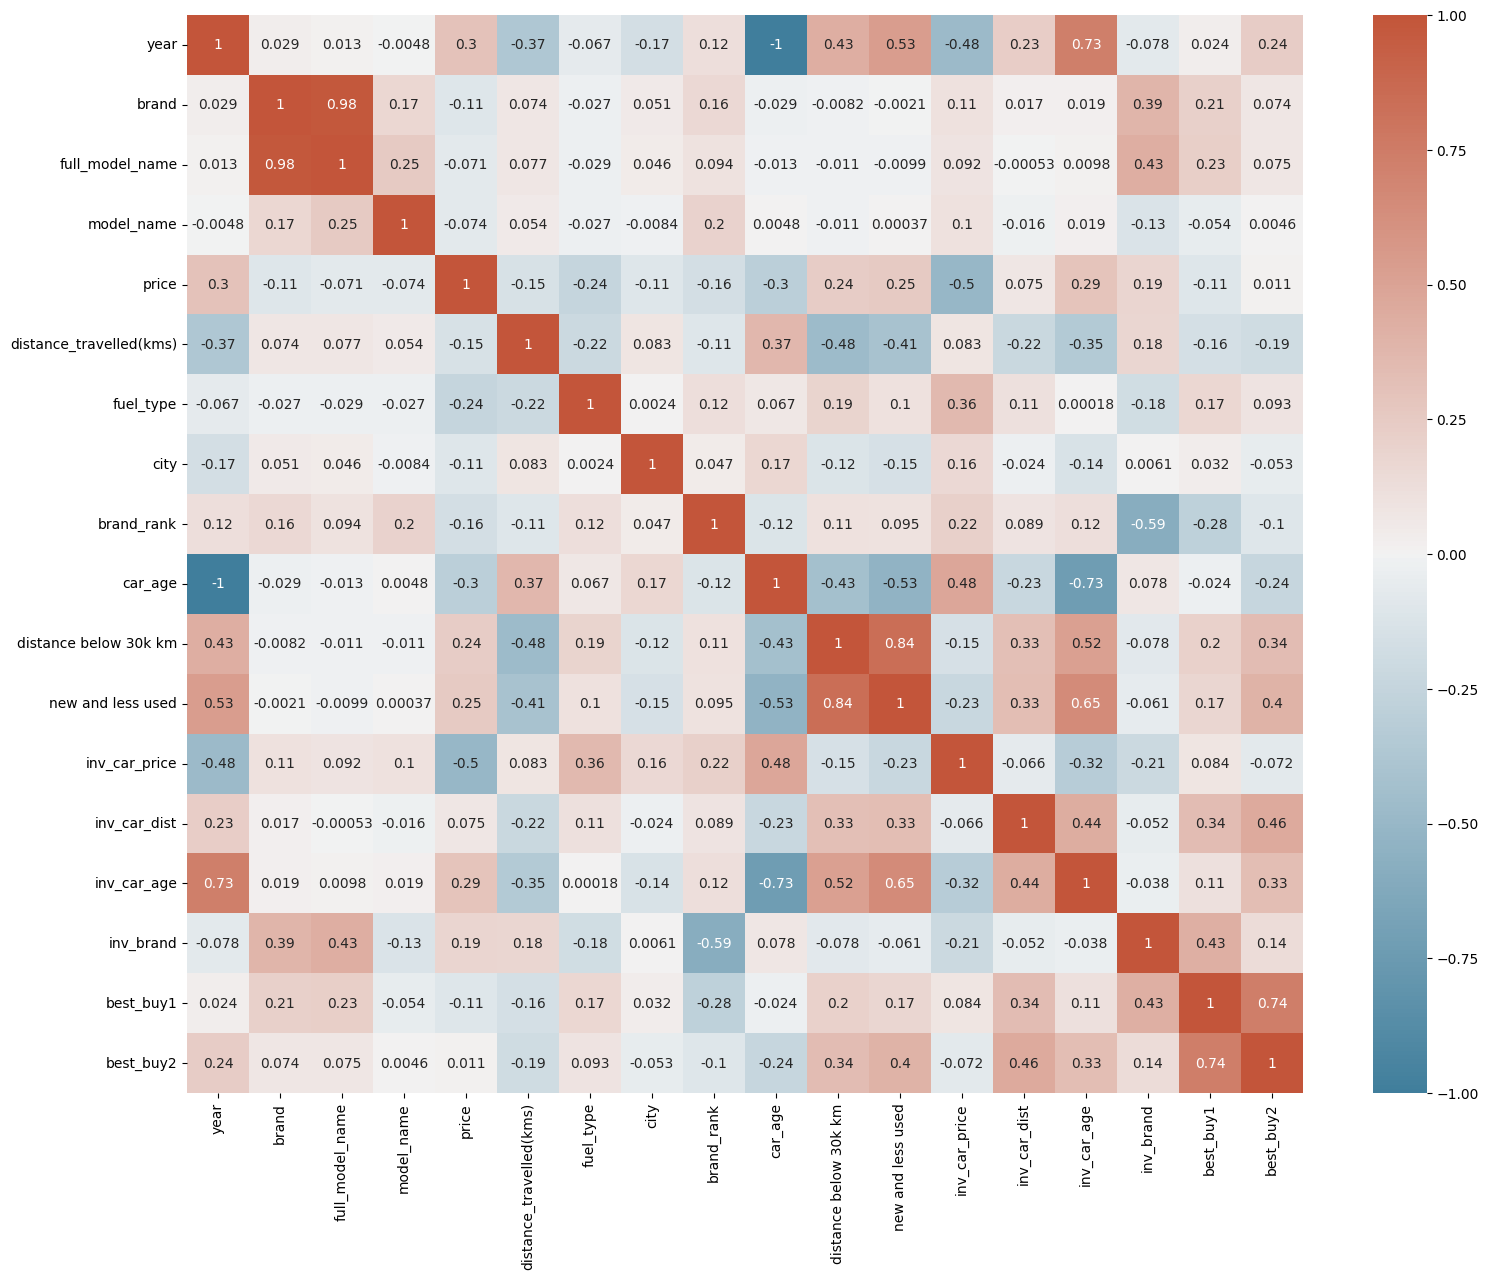

In [419]:
cols = ['full_model_name','city','brand_rank','car_age','distance below 30k km','new and less used','inv_car_price','inv_car_dist','inv_car_age','inv_brand','std_invprice','std_invdistance_travelled','std_invrank','best_buy1','best_buy2',]
get_heat_map_corr( df_labeled,figsize=(18,14) ,remove_cols=[cols], mirrored=True)
# df.columns

In [420]:
# looking into *inv* columns
df.columns
df[['year','full_model_name','model_name','price','distance_travelled(kms)','car_age','inv_car_price','inv_car_dist','inv_car_age','inv_brand','best_buy1','best_buy2',]
].describe()

,year,price,distance_travelled(kms),car_age,inv_car_price,inv_car_dist,inv_car_age,inv_brand,best_buy1,best_buy2
count,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00
mean,2015.26,1479682.69,55235.62,5.74,0.00,0.00,inf,0.19,90.02,30.62
std,3.25,1720192.76,47298.04,3.25,0.00,0.00,NaN,0.26,191.95,154.08
min,1990.00,62500.00,350.00,0.00,0.00,0.00,0.03,0.01,0.00,0.00
25%,2013.00,525000.00,30000.00,3.00,0.00,0.00,0.12,0.04,14.23,0.00
50%,2016.00,842500.00,50227.00,5.00,0.00,0.00,0.20,0.07,35.68,0.00
75%,2018.00,1796250.00,72000.00,8.00,0.00,0.00,0.33,0.25,91.43,0.00
max,2021.00,14700000.00,790000.00,31.00,0.00,0.00,inf,1.00,2477.52,2477.52


<Figure size 2000x2000 with 0 Axes>

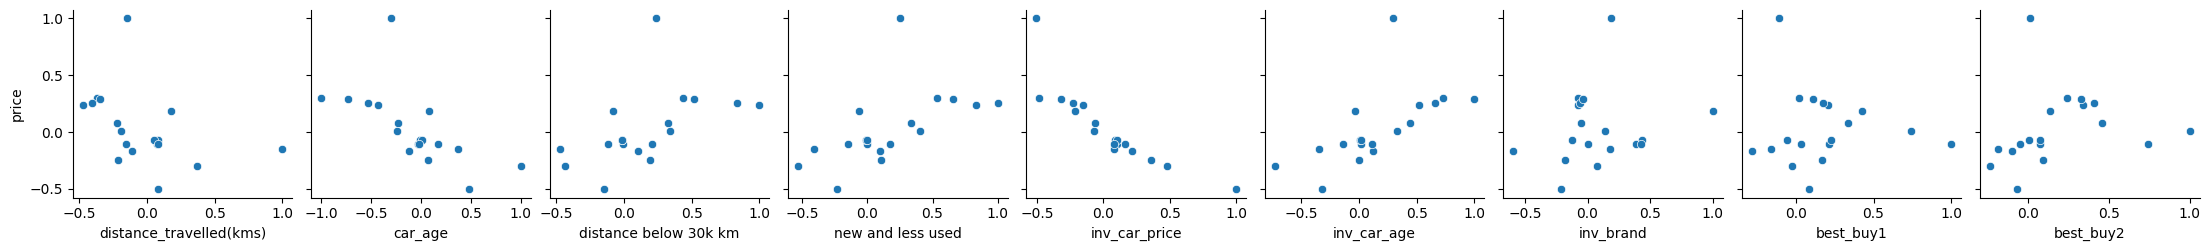

In [421]:
plt.figure(figsize=(20, 20))
sns.pairplot(
    df_labeled.corr(), 
    x_vars=[
        'distance_travelled(kms)',
        # 'fuel_type',
        'car_age',
        # 'brand_rank',
        'distance below 30k km',
        'new and less used',
        'inv_car_price',
        'inv_car_age',
        'inv_brand',
        'best_buy1',
        'best_buy2',],
    y_vars='price',
    kind='scatter',
    )

# df

<Axes: ylabel='brand'>

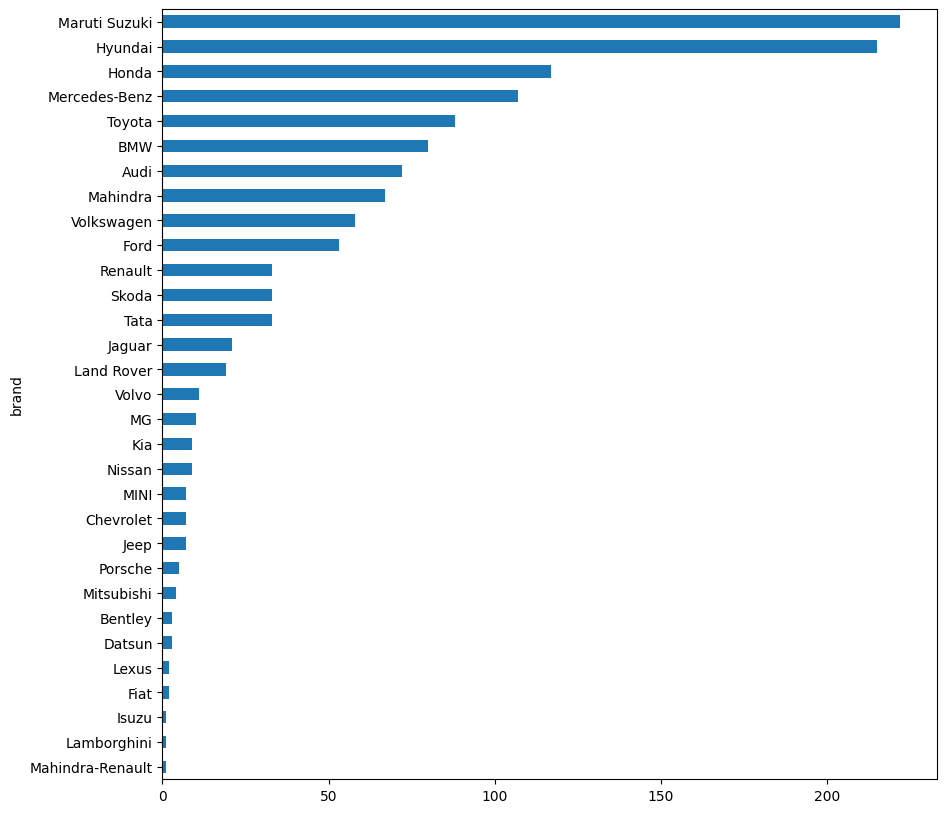

In [422]:
# plot top cars
df['brand'].value_counts().sort_values().plot(kind='barh', figsize=(10,10))

<Axes: ylabel='Frequency'>

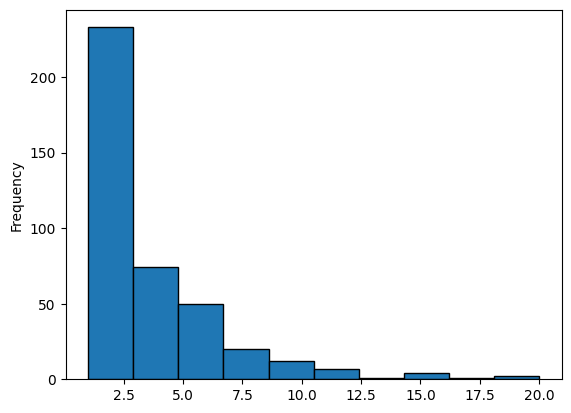

In [423]:
# plot hist of price
df['price'].value_counts().plot(kind='hist', edgecolor='black')

<BarContainer object of 19 artists>

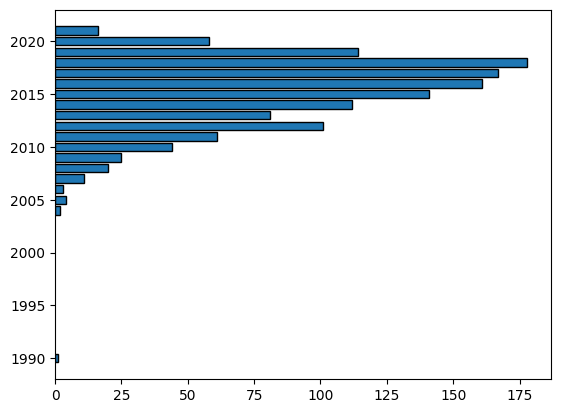

In [424]:
# plot years 
# df['year'].value_counts().plot(kind='hist')
top_print = 15
# plt.barh( df['year'].value_counts()[:top_print].index, df['year'].value_counts()[:top_print], edgecolor='black' )
plt.barh( df['year'].value_counts().index, df['year'].value_counts(), edgecolor='black' )
# df['year'].value_counts()[:top_print]

In [425]:
# deleting cars below year 2006, only 10 entries
# 4 car(s) for year 2005	
# 3 car(s) for year 2006	
# 2 car(s) for year 2004	
# 1 car(s) for year 1990	

df['year'].value_counts().reset_index()
df[df['year'] <= 2006].index
df[df['year'] <= 2006]
# df.shape
df = df.drop(index=df[df['year'] <= 2006].index)
df.shape

(1290, 18)

In [426]:
df[df['year'] == 2006]
# df['year'].value_counts().reset_index()

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,distance below 30k km,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,best_buy1,best_buy2


In [427]:
df[["year", 'car_age', 'inv_car_age']]
df.columns

Index(['year', 'brand', 'full_model_name', 'model_name', 'price',
       'distance_travelled(kms)', 'fuel_type', 'city', 'brand_rank', 'car_age',
       'distance below 30k km', 'new and less used', 'inv_car_price',
       'inv_car_dist', 'inv_car_age', 'inv_brand', 'best_buy1', 'best_buy2'],
      dtype='object')

In [428]:
df['car_age'] = df['car_age'].astype(int)
# df['car_age'] .value_counts()

Text(0, 0.5, 'millage')

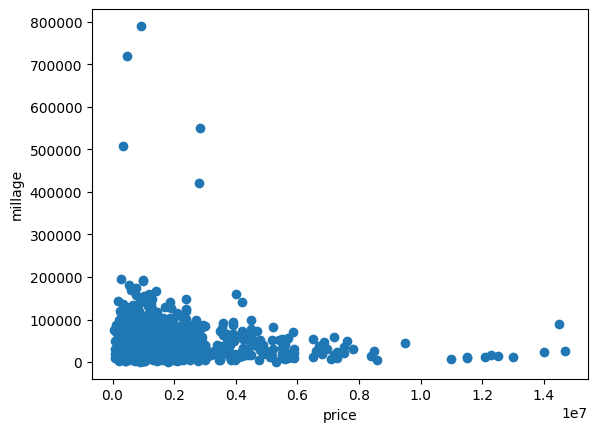

In [429]:
plt.scatter(df['price'], df['distance_travelled(kms)'] )
plt.xlabel("price")
plt.ylabel("millage")

fuel_type
Diesel        684
Petrol        593
CNG + 1         7
Petrol + 1      5
Hybrid          1
Name: count, dtype: int64

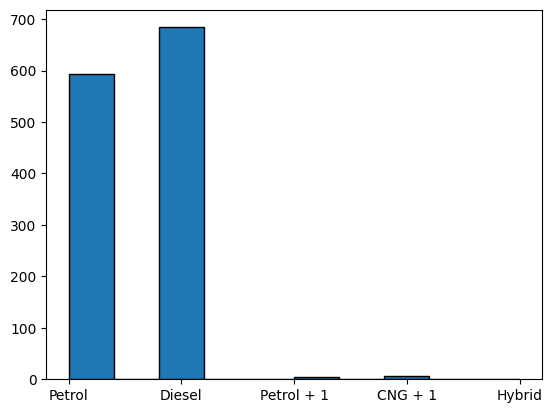

In [430]:
# plotting fuel type
plt.hist(df['fuel_type'], edgecolor='black')
df['fuel_type'].value_counts()

In [431]:
# print average car price per fuel type
df_fuel_gruop = df.groupby('fuel_type')
df_fuel_gruop.value_counts().reset_index()

fuel_type_avg_car_price = {}
for i in df['fuel_type'].drop_duplicates():
    fuel_type_avg_car_price[i] = float(df_fuel_gruop.get_group(i)['price'].mean())
fuel_type_avg_car_price

# fuel = list(fuel_type_avg_car_price.values())
# price = list(fuel_type_avg_car_price.keys())
# print(fuel)
# print(price)

# plt.bar(fuel, price)

sorted_dict = dict(sorted(fuel_type_avg_car_price.items(), key=lambda x: x[1], reverse=True))
sorted_dict

{'Hybrid': 2100000.0,
 'Diesel': 1900096.49122807,
 'Petrol': 1031402.1922428331,
 'Petrol + 1': 446000.0,
 'CNG + 1': 436428.5714285714}

In [432]:
# print distance_travelled per fuel type
df_fuel_gruop = df.groupby('fuel_type')
df_fuel_gruop.value_counts().reset_index()

millage_avg_pre_fuel = {}
for i in df['fuel_type'].drop_duplicates():
    millage_avg_pre_fuel[i] = float(df_fuel_gruop.get_group(i)['distance_travelled(kms)'].mean())

millage_avg_pre_fuel
sorted_dict = dict(sorted(millage_avg_pre_fuel.items(), key=lambda x: x[1], reverse=True))
sorted_dict

{'Diesel': 64659.554093567254,
 'CNG + 1': 56376.857142857145,
 'Petrol + 1': 51017.4,
 'Petrol': 43473.564924114675,
 'Hybrid': 3000.0}

{'Honda': 7,
 'Nissan': 11,
 'Toyota': 1,
 'Mercedes-Benz': 2,
 'Hyundai': 14,
 'Maruti Suzuki': 32,
 'Renault': 15,
 'Volkswagen': 3,
 'Skoda': 27,
 'BMW': 4,
 'Tata': 40,
 'Audi': 10,
 'Bentley': 44,
 'Ford': 8,
 'Mahindra': 24,
 'Jaguar': 40,
 'Lamborghini': 45,
 'MINI': 39,
 'Land Rover': 18,
 'Chevrolet': 12,
 'Datsun': 50,
 'Jeep': 19,
 'Porsche': 5,
 'Volvo': 9,
 'MG': 81,
 'Lexus': 16,
 'Mitsubishi': 46,
 'Kia': 20,
 'Fiat': 43,
 'Isuzu': 37,
 'Mahindra-Renault': 24}

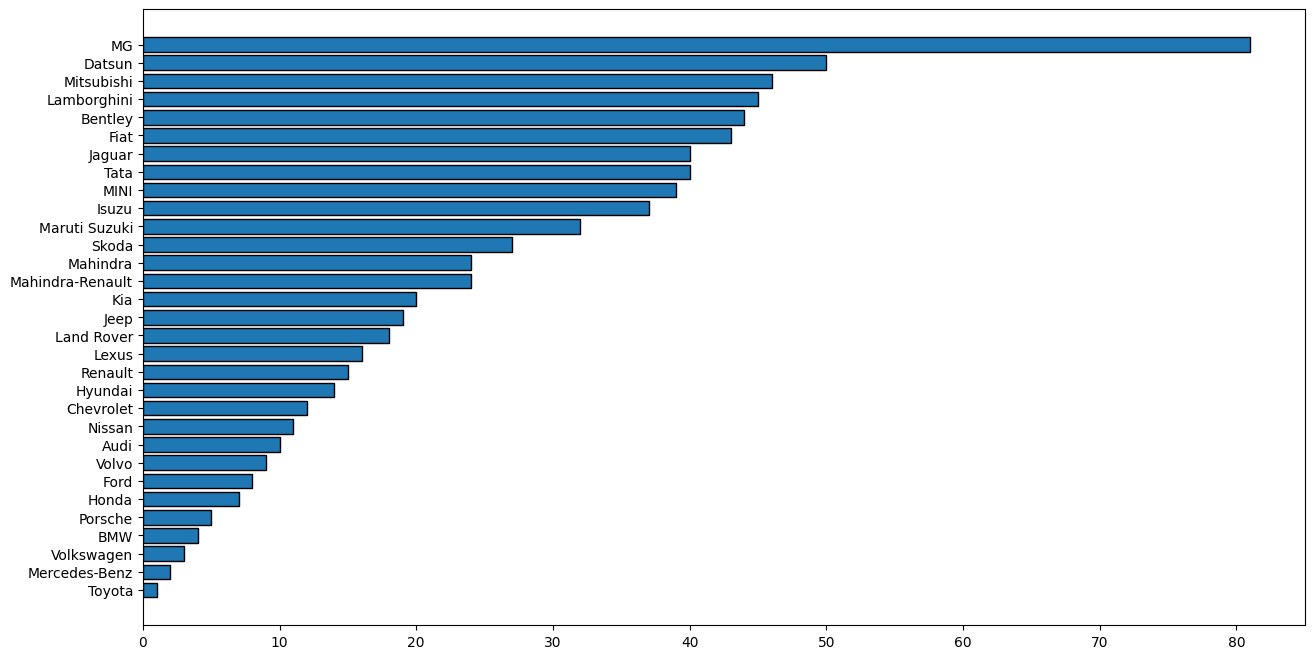

In [433]:
df[['brand','brand_rank']]
df_brand_group = df.groupby('brand')
df_brand_group.value_counts()
brand_rank = {}
for i, j in enumerate(df['brand'].unique()):
    # print(i, j)
    # print(df_brand_group.get_group(j)['brand_rank'].mean())
    brand_rank[j] = int(df_brand_group.get_group(j)['brand_rank'].mean())

brand_rank
brand_rank_df = pd.DataFrame(list(brand_rank.items()), columns=['brand', 'mean_rank'])
brand_rank_df=brand_rank_df.sort_values(by='mean_rank')

plt.figure(figsize=(15,8))
plt.barh(brand_rank_df['brand'], brand_rank_df['mean_rank'], edgecolor='black')
# # plt.barh(j,df_brand_group.get_group(j)['brand_rank'].mean(), edgecolor='black')
# plt.xlabel('mean_rank')
# plt.ylabel('brand')
brand_rank

### linear regression

In [434]:
label = LabelEncoder()

cols_to_encode = [i for i in df.columns if df[i].dtype == 'object']
cols_to_encode

for c in cols_to_encode:
    label.fit(df[c].drop_duplicates())
    df[c] = label.transform(df[c])
    # print(c, df[c].isnull().sum())

df.head(2)

,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age,distance below 30k km,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,best_buy1,best_buy2
0,2016,7,130,28,425000.00,9680.00,3,9,7,5,1,0,0.00,0.00,0.20,0.14,677.13,0.00
1,2012,23,567,127,325000.00,119120.00,1,9,11,9,0,0,0.00,0.00,0.11,0.09,37.50,0.00


In [435]:
# get X and delete columns I don't understand what they do
# drop target column
X = df.drop('price',axis=1)
X.head(0)

# drop columns repeating data column or *inv* columns
drop_cols = ['brand', 'model_name']
xtra = []
# xtra = ['brand', 'model_name','inv_car_price', 'inv_car_dist', 'inv_car_age', 'inv_brand']
# xtra = ['brand', 'model_name','inv_car_price', 'inv_car_dist', 'inv_car_age', 'inv_brand', 'best_buy1', 'best_buy2']
drop_cols += xtra

X = X.drop(drop_cols,axis=1)
X.head(3)

,year,full_model_name,distance_travelled(kms),fuel_type,city,brand_rank,car_age,distance below 30k km,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,best_buy1,best_buy2
0,2016,130,9680.00,3,9,7,5,1,0,0.00,0.00,0.20,0.14,677.13,0.00
1,2012,567,119120.00,1,9,11,9,0,0,0.00,0.00,0.11,0.09,37.50,0.00
2,2017,671,64593.00,1,14,1,4,0,0,0.00,0.00,0.25,1.00,96.65,0.00


In [436]:
c = "inv_brand"
print(df[c].min())
print(df[c].max())

0.0123456790123456
1.0


In [437]:
scaler = StandardScaler()

scale_cols = [
    'inv_car_price',
	'inv_car_dist',
	# 'inv_car_age',
]
for i in scale_cols:
    # try except block for when test with different columns
    try:
        X[i] = scaler.fit_transform(X[[i]])
    except:
        pass

    # X[i].describe()

In [438]:
# finding column with infinite value
for i in X.columns:
    inf = np.isinf(X[i]).values.sum()
    if inf != 0:
        print(inf, i)

16 inv_car_age


In [439]:
try:
    X["inv_car_age"].replace([np.inf, -np.inf], 0, inplace=True)
except:pass
# X["inv_car_age"].value_counts()

In [440]:
y = df['price'].to_numpy()

In [441]:
print(X.shape)
print(y.shape)

(1290, 15)
(1290,)


In [442]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# X_s = sc.fit(X)

In [443]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
# # X_train


LinearRegression()

In [444]:
# lin_model.coef_

In [445]:
# get sorted coef_ 
data = {}
for indx, col_name in enumerate(X_train):
    # print(col_name, lin_model.coef_[indx])
    # print(col_name, indx, lin_model.coef_[indx])
    data[col_name] = lin_model.coef_[indx]
data = dict(sorted(data.items(), key=lambda x: x[1],reverse=True))
data

{'inv_brand': 1907782.1318349212,
 'inv_car_age': 1227898.792180068,
 'distance below 30k km': 826198.0638096834,
 'inv_car_dist': 125939.26049070743,
 'car_age': 19643.154226656825,
 'city': 2156.5653245212743,
 'best_buy2': 950.826432682281,
 'distance_travelled(kms)': -4.6593643087317105,
 'full_model_name': -589.2026245345983,
 'best_buy1': -3018.22976969548,
 'brand_rank': -5765.920824937367,
 'year': -19643.1542266685,
 'fuel_type': -159641.55837802158,
 'new and less used': -251109.1903827457,
 'inv_car_price': -561913.3910016479}

In [446]:
lin_model.score(X_test,y_test)  # prev score 0.27454712364998857

0.36903712117028553

In [460]:
# scores = cross_val_score(lin_model, X, y, cv=X.shape[1])
scores = cross_val_score(lin_model, X, y, cv=6)
print(f"scores {scores}")
print(f"mean() {scores.mean()}", )

scores [0.25055981 0.23086411 0.29868858 0.23567103 0.26498328 0.33784657]
mean() 0.26976889527874054


In [448]:
lin_model.predict(X_test)
lin_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

(1032,)
(1032,)


0.3567595145144997

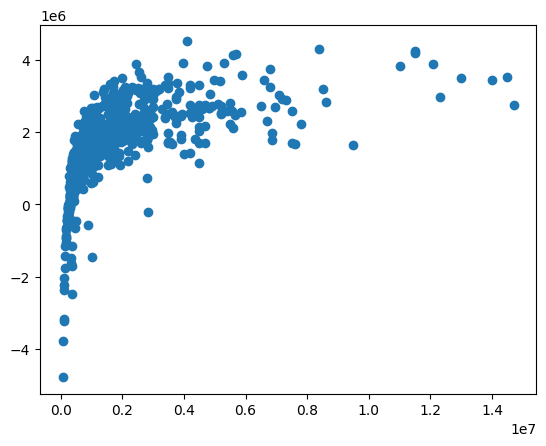

In [449]:
y_pred_train = lin_model.predict(X_train)
plt.scatter(y_train, y_pred_train)
print(y_train.shape)
print(y_pred_train.shape)
r2_score(y_train, y_pred_train)

0.36903712117028553

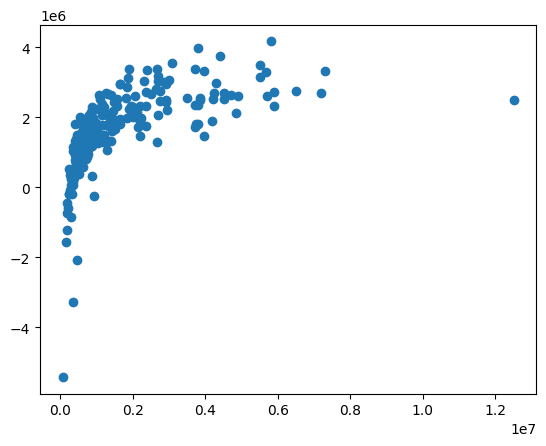

In [450]:
y_pred_test = lin_model.predict(X_test)
plt.scatter(y_test, y_pred_test)
r2_score(y_test, y_pred_test)

In [451]:
# from sklearn.ensemble import RandomForestRegressor

# forest = RandomForestRegressor()

# forest.fit(X_train,y_train)
# forest.score(X_train,y_train)